In [269]:
# Anscombe quartet (n)

In [270]:
# Proszę przygotować skrypt (plik z rozszerzeniem *.py), który:
# - będzie uruchamiany z konsoli przez np. python nazwa_skryptu.py
# - musi zawierać funkcję main(), sprawdź tutaj
# - zapisze wyniki obliczeń (mean, std, corr, var) w pliku *.csv
# - wygeneruje jeden obraz jpg z 4 wykresami (subploty, 2 kolumny x 2 wiersze)
# - plik jpg oraz csv mają być zapisane do jednego folderu np. "output"

# Kod musi spełniać zasady:
# - PEP8
# - DRY
# - musi zawierać funkcje z docstring oraz type hints
# - musi być sprawdzony przez inną osobę (zatwierdzony code review)

# Proszę wstawić print screen ze swojego repozytorium z kodem oraz tak aby była widoczna nazwa 
# użytkownika (autora)
# Nazwa pliku (bez polskich znaków):
# Nazwisko_Imie_anscombe_niestacj.jpg

In [271]:
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
def hello_func() -> None:
    """Prints hello massage with Anscombe's quartet introduction. Returns: None"""
    
    print("Hello in Anscombe's quartet demo.\n")
    print(
    """    According to the definition given in Wikipedia, Anscombe’s quartet comprises four datasets 
    that have nearly identical simple statistical properties, yet appear very different when graphed. 
    Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician 
    Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect 
    of outliers on statistical properties.\n"""
)

In [273]:
def makedir(name: str="output") -> None:
    """
    Makes new directory. 
    Parameters: name (str): Name your folder. (Default: 'output')
    Returns: None
    """
    
    resposne = input(f"Write 'ok' and confirm by hitting ENTER to make {name} dir.\n ")
    
    if resposne == "ok" :
        try:
            os.makedirs(name) 
            print(f"Have a nice new directory: {name}\n")
        
        except FileExistsError:
            print(f"Cannot create a file that already exists: {name}\n")
            
    else:
        print("Making new directory aborted.\n")

In [274]:
def data_as_anscombe(multiindex: bool=True, save: bool=False) -> pd.DataFrame:
    """ 
    Makes DataFrame from Anscombe quartet's data. Data included.
        Parameters:
            multiindex (bool): Adds multiindex columns to DataFrame. (Default: True)
            save (bool): Create csv file with anscombe df. (Default: False)
        Returns: anscombe_df (DataFrame)
    """
    
    x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
    y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
    y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

    # Iterates len(x) times through zipped variables... 
    # x[0], y1[0]... x[1], y1[1]... and return list of tuples.
    list_of_tuples = list(zip(x, y1, x, y2, x, y3, x4, y4))
    cols = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]
    anscombe_df = pd.DataFrame(list_of_tuples, columns=cols)
    
    if multiindex == True:
        top_index = ["I", "I", "II", "II", "III", "III", "IV", "IV"]
        multi_cols = [np.array(top_index), np.array(cols)]
        anscombe_df.columns = multi_cols
    
    if save == True:
        anscombe_df.to_csv("output/anscombe_df.csv", index=False)
    
    return anscombe_df

In [275]:
def stats_in_frame(df: pd.DataFrame, save: bool=False) -> pd.DataFrame:
    """
    Makes DataFrame from Anscombe quartet's statistics. Uses anscombe_statistics function.
        Parameters:
            df (pd.DataFrame): Multiindex DataFrame with anscombe's data.
            save (bool): Create csv file with calculated_stats_df. (Default: False)
        Returns: calculated_stats_df (DataFrame)
    """
    
    
    def anscombe_statistics(a: list, b: list, roundit: int=2) -> list:
        """
        Calculates variance, mean, standard deviation and pearson correlation.
            Parameters:
                a, b (array-like): Values to calculate. 'b' is used only for correlation.
                roundit (int): Specified number of decimal. (Default: 2)
            Returns: [var, mean, std, corr] (list)
        """
        
        var = round(np.var(a), roundit)
        mean = round(np.mean(a), roundit)
        std = round(np.std(a), roundit)
        corr = round(pearsonr(a, b)[0], roundit)

        return [var, mean, std, corr]
    
    
    set_I = anscombe_statistics(df["I"]["x1"], df["I"]["y1"], roundit=3)
    set_II = anscombe_statistics(df["II"]["x2"], df["II"]["y2"], roundit=3)
    set_III = anscombe_statistics(df["III"]["x3"], df["III"]["y3"], roundit=3)
    set_IV = anscombe_statistics(df["IV"]["x4"], df["IV"]["y4"], roundit=3)
    
    columns = ["var", "mean", "std", "corr"]
    index = ["set_I", "set_II", "set_III", "set_IV"]
    data = [set_I, set_II, set_III, set_IV]
    calculated_stats_df = pd.DataFrame(data, index=index, columns=columns)
    
    if save == True:
        calculated_stats_df.to_csv("output/calculated_stats_df.csv", index_label="index")
        
    return calculated_stats_df

In [276]:
def stats_plot(df: pd.DataFrame, save: bool=False) -> plt:
    """
    Makes bar plot of given statistics.
        Parameters:
            df (pd.DataFrame):
            save (bool): Create csv file with calculated_set_df. (Default: False)
        Returns: plot (plt)
    """
    plot = df.plot(kind="bar", figsize=(9.5, 9), grid=True, legend=True, 
                   title="Simple statistics comparison", rot=0)
    
    if save == True:
        plt.savefig("output/stats_plot.jpg")

In [277]:
def sets_regplot(df: pd.DataFrame=my_anscombe_df, save=False) -> plt:
    """
    Makes scatter plot with regression line for given statistics.
        Parameters:
            df (pd.DataFrame): Multiindex DataFrame with anscombe's data.
            save (bool): Create jpg file with sets_regplot. (Default: False)
        Returns: plot (plt)
    """

    fig, axes = plt.subplots(2,2, figsize = (9.125, 9), sharex=True, sharey=True)
    plt.suptitle("Regression plot for Anscombe's quartet.")
    
    axes[0, 0].set(xlim=(2, 20), ylim=(2, 14))
    axes[0, 0].set(xticks=(range(2, 22, 2)), yticks=(range(2, 16, 2)))
    
    sns.regplot(x=df["I"]["x1"], y=df["I"]["y1"], ax=axes[0, 0], 
                scatter_kws={"color": "green"}, line_kws={"color": "red"})
    axes[0, 0].title.set_text("Set I")
    axes[0, 0].grid();

    sns.regplot(x=df["II"]["x2"], y=df["II"]["y2"], ax=axes[0, 1],
               scatter_kws={"color": "green"}, line_kws={"color": "red"})
    axes[0, 1].title.set_text("Set II")
    axes[0, 1].grid();
    
    sns.regplot(x=df["III"]["x3"], y=df["III"]["y3"], ax=axes[1, 0],
               scatter_kws={"color": "green"}, line_kws={"color": "red"})
    axes[1, 0].title.set_text("Set III")
    axes[1, 0].grid();

    sns.regplot(x=df["IV"]["x4"], y=df["IV"]["y4"], ax=axes[1, 1],
               scatter_kws={"color": "green"}, line_kws={"color": "red"})
    axes[1, 1].title.set_text("Set IV") 
    axes[1, 1].grid();
    
    if save == True:
        plt.savefig("output/sets_regplot.jpg")

In [278]:
def main():
    
    # introduction
    hello_func()
    
    # new directory for output
    makedir("output")
    
    # anscombe's data with simple statistics
    input("Press any key to see data ")
    my_anscombe_df = data_as_anscombe(multiindex=True, save=True)
    display(my_anscombe_df)
    my_calculated_stats_df = stats_in_frame(my_anscombe_df, save=True)
    display(my_calculated_stats_df)
    
    # bar plot for statistics, regression plot for anscombe's data
    input("Press any key to see plots ")
    stats_plot(my_calculated_stats_df, save=True);
    sets_regplot(my_anscombe_df, save=True);

Hello in Anscombe's quartet demo.

    According to the definition given in Wikipedia, Anscombe’s quartet comprises four datasets 
    that have nearly identical simple statistical properties, yet appear very different when graphed. 
    Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician 
    Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect 
    of outliers on statistical properties.



Write 'ok' and confirm by hitting ENTER to make output dir.
  fuck u


Making new directory aborted.



Press any key to see data  


I         II       III         IV       
    x1     y1  x2    y2  x3     y3  x4     y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

,var,mean,std,corr
set_I,10.0,9.0,3.162,0.816
set_II,10.0,9.0,3.162,0.816
set_III,10.0,9.0,3.162,0.816
set_IV,10.0,9.0,3.162,0.817


Press any key to see plots  


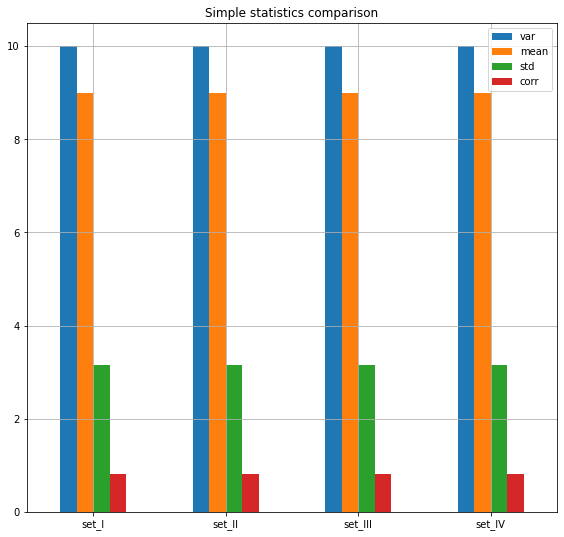

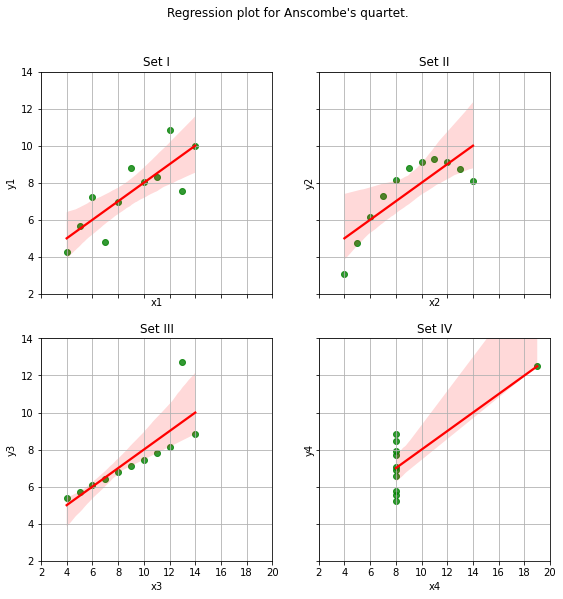

In [279]:
main()

# if __name__ == "__main__":
#     main()

In [280]:
# # shell command convert .ipynb to .py
# !jupyter nbconvert --to script anscombe_quartet.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook anscombe_quartet.ipynb to script
[NbConvertApp] Writing 8284 bytes to anscombe_quartet.py
